In [2]:

from pandas.plotting import scatter_matrix

'''
DNA and PSY data analysis

'''
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA


path_csv = "./data/data_analysis.csv"

kg_df = pd.read_csv(path_csv)
samples = kg_df.pop('Sample')


All data from dna samples n = 397
14 scales:
Spontaneous,
Emotional,
Decisive,
Optimist,
Strategic,
Risk-taker,
Sex driven,
Confident,
Calm,
Innovative,
Social,
Stress tolerant,
Bon vivant,
Self aware

Corresponding psychological assessment
big5/ OCEAN
7 scales:
Cooperation,
Leadership,
Openness,
Conscientiousness,
Extraversion,
Agreeableness,
Neuroticism

array([[<Axes: xlabel='dn03', ylabel='dn03'>,
        <Axes: xlabel='dn14', ylabel='dn03'>,
        <Axes: xlabel='ps15', ylabel='dn03'>,
        <Axes: xlabel='ps16', ylabel='dn03'>,
        <Axes: xlabel='ps17', ylabel='dn03'>,
        <Axes: xlabel='ps18', ylabel='dn03'>,
        <Axes: xlabel='ps19', ylabel='dn03'>],
       [<Axes: xlabel='dn03', ylabel='dn14'>,
        <Axes: xlabel='dn14', ylabel='dn14'>,
        <Axes: xlabel='ps15', ylabel='dn14'>,
        <Axes: xlabel='ps16', ylabel='dn14'>,
        <Axes: xlabel='ps17', ylabel='dn14'>,
        <Axes: xlabel='ps18', ylabel='dn14'>,
        <Axes: xlabel='ps19', ylabel='dn14'>],
       [<Axes: xlabel='dn03', ylabel='ps15'>,
        <Axes: xlabel='dn14', ylabel='ps15'>,
        <Axes: xlabel='ps15', ylabel='ps15'>,
        <Axes: xlabel='ps16', ylabel='ps15'>,
        <Axes: xlabel='ps17', ylabel='ps15'>,
        <Axes: xlabel='ps18', ylabel='ps15'>,
        <Axes: xlabel='ps19', ylabel='ps15'>],
       [<Axes: xlabel='dn03', y

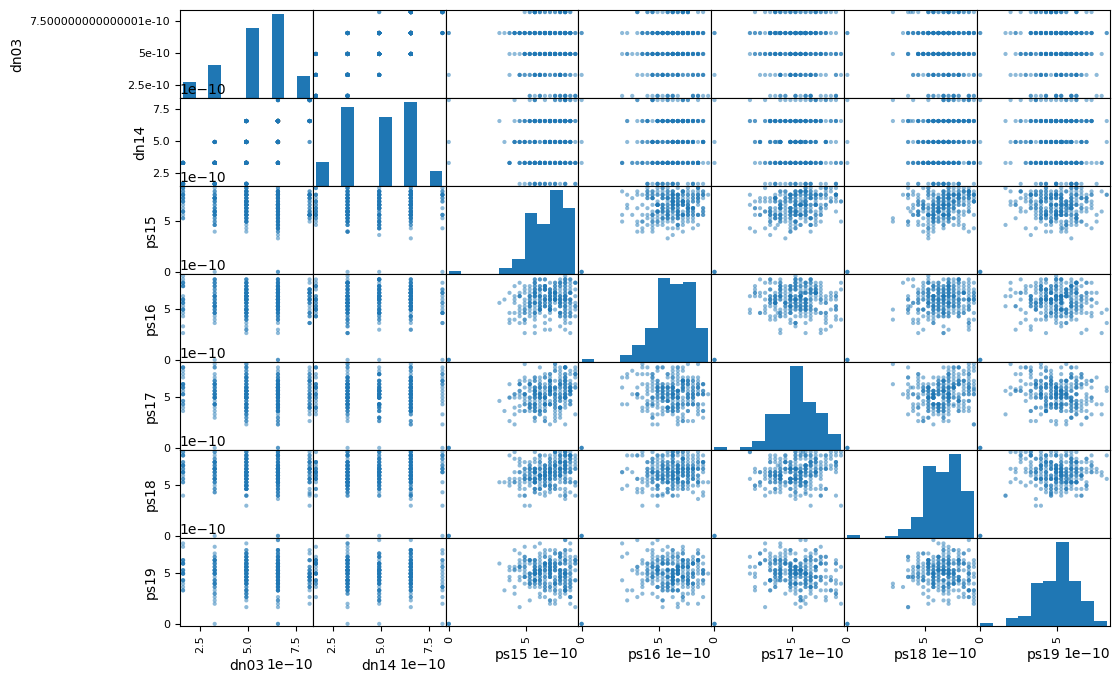

In [17]:
kg_df.columns =['dn01', 'dn02', 'dn03', 'dn04', 'dn05', 'dn06', 'dn07', 'dn08', 'dn09',
       'dn10', 'dn11', 'dn12', 'dn13', 'dn14', 'mp04', 'mp02', 'ps15', 'ps16', 'ps17',
       'ps18', 'ps19']
kg_df = kg_df.div(5)
full_kg_df = kg_df.dropna()

vis_dna = full_kg_df.loc[:, :'dn14']
vis_psy = full_kg_df.loc[:, 'mp04':'ps19']

from pandas.plotting import scatter_matrix
attributes = ['dn03', 'dn14','ps15', 'ps16', 'ps17',
       'ps18', 'ps19']
scatter_matrix(kg_df[attributes], figsize=(12, 8))


In [4]:
pca_1 = PCA(n_components=2)
pca_1.fit(vis_dna)
pca_1.explained_variance_
pca_1.explained_variance_ratio_

x_trans_dna = pca_1.transform(vis_dna)
x_reduced_dna = pca_1.inverse_transform(x_trans_dna)

pca_2 = PCA(n_components=2)
pca_2.fit(vis_psy)
pca_2.explained_variance_
pca_2.explained_variance_ratio_

x_trans_psy = pca_2.transform(vis_psy)
x_reduced_psy = pca_2.inverse_transform(x_trans_psy)

x_trans_psy.shape


(298, 2)

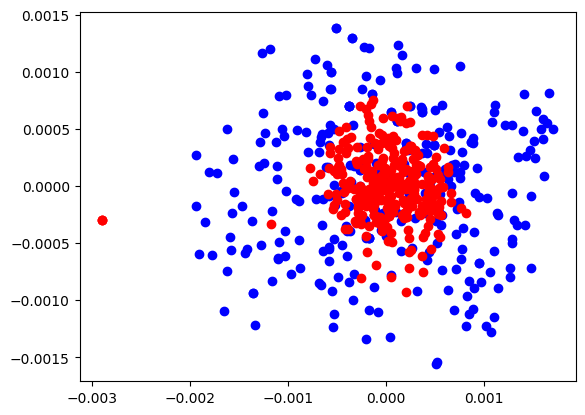

In [84]:
plt.scatter(x_trans_dna[:,[0]], x_trans_dna[:,[1]], c='b')
plt.scatter(x_trans_psy[:,[0]], x_trans_psy[:,[1]], c='r')



data normalized and complete

1. split into train/test
2. remaining dna data without psy data to be used to predict psy values
3. comparing with calculated (kg logics)
4. needed: environmental variable



In [6]:
kg_calc_dna = {}
i = 0
for ps15, ps16, ps17, ps18, ps19 in zip(full_kg_df['ps15'], full_kg_df['ps16'], full_kg_df['ps17'], full_kg_df['ps18'], full_kg_df['ps19']):

   ps01 = (2 * ps15 + (1.2 - ps16) + ps17)/4
   ps02 = (2 * ps15 + ps17)/3
   ps03 = (ps16 + 2 * ps17 +(1.2 - ps18))/4
   ps04 = ((1.2 - ps16) + ps17 + 2 * (1.2 - ps19))/4
   ps05 = (2 * ps16 + (1.2 - ps18))/3
   ps06 = ((1.2-ps16) + 2 * ps17 + (1.2 - ps19))/4
   ps07 = (2 * ps17 + (1.2 - ps19))/3
   ps08 = (2 *(1.2 - ps19) + ps16)/3
   ps09 = (2 * (1.2 - ps19) + (1.2 - ps17) + ps16)/4
   ps10 = (2 * ps15 + (1.2 - ps16) + ps17)/4
   ps11 = (2 * ps18 + (1.2 - ps16))/3
   ps12 = (2 * (1.2 - ps19) + ps16)/3
   ps13 = (2* ps15 + (1.2 - ps16) + ps17 + (1.2 - ps19))/5
   ps14 = (ps15 + ps16)/2

   kg_calc_dna[i] = [ps01, ps02, ps03, ps04, ps05, ps06, ps07, ps08, ps09, ps10, ps11, ps12, ps13, ps14]
   i += 1


In [7]:
calc_df = pd.DataFrame(kg_calc_dna)
calc_df = calc_df.T
calc_df.columns = ['ps01', 'ps02', 'ps03', 'ps04', 'ps05', 'ps06', 'ps07', 'ps08', 'ps09', 'ps10', 'ps11', 'ps12', 'ps13', 'ps14']
calc_df.head()

,ps01,ps02,ps03,ps04,ps05,ps06,ps07,ps08,ps09,ps10,ps11,ps12,ps13,ps14
0,0.53,0.573333,0.56,0.37,0.666667,0.43,0.440000,0.453333,0.51,0.53,0.666667,0.453333,0.480,0.70
1,0.76,0.893333,0.76,0.82,0.626667,0.83,0.986667,0.920000,0.74,0.76,0.786667,0.920000,0.800,0.84
2,0.71,0.773333,0.63,0.69,0.586667,0.68,0.733333,0.733333,0.67,0.71,0.706667,0.733333,0.720,0.74
3,0.88,0.986667,0.70,0.62,0.506667,0.74,0.800000,0.533333,0.46,0.88,0.826667,0.533333,0.800,0.82
4,0.81,0.880000,0.57,0.59,0.480000,0.64,0.653333,0.546667,0.53,0.81,0.840000,0.546667,0.752,0.78


In [90]:
from sklearn.model_selection import train_test_split
X = full_kg_df.loc[:, :'dn14']
Y = calc_df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (238, 14)
X_test shape: (60, 14)
Y_train shape: (238, 14)
Y_test shape: (60, 14)


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(14, activation='linear')
])

Y_train = np.argmax(Y_train, axis=1)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=100)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/michaelrohrig/pycore/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/michaelrohrig/pycore/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/michaelrohrig/pycore/.venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io

AttributeError: _ARRAY_API not found

NameError: name 'np' is not defined

In [92]:
results = model.evaluate(X_test, np.argmax(Y_test.values, axis=1), verbose=0)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

Test Loss: 1.6426310539245605
Test Accuracy: 0.4166666567325592
